In [25]:
import pandas as pd

In [2]:
time = pd.read_csv("delivery_time.csv")

In [3]:
time.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [27]:
time = time.rename(columns={'Delivery Time':'delivery_time','Sorting Time':'sorting_time'})

In [33]:
import statsmodels.formula.api as smf

In [34]:
time.head()

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [35]:
model = smf.ols('delivery_time~sorting_time',data=time).fit()

In [37]:
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [42]:
print(model.tvalues ," \n" ,model.pvalues)

Intercept       3.823349
sorting_time    6.387447
dtype: float64  
 Intercept       0.001147
sorting_time    0.000004
dtype: float64


In [43]:
print(model.rsquared," \n",model.rsquared_adj)

0.6822714748417231  
 0.6655489208860244


In [44]:
time.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


In [46]:
from statsmodels.graphics.regressionplots import influence_plot

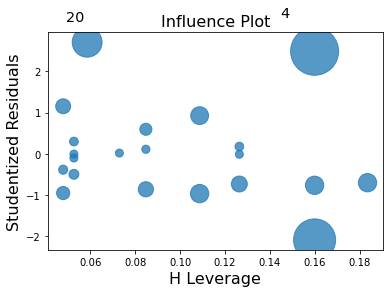

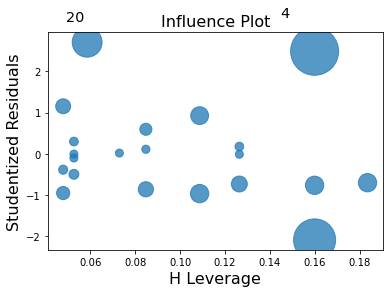

In [47]:
influence_plot(model)

In [48]:
time.head()

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [53]:
time = time.drop(index=[20,4])

In [60]:
model = smf.ols('delivery_time ~ sorting_time',data = time).fit()

In [61]:
model.params

Intercept       6.797013
sorting_time    1.504059
dtype: float64

In [62]:
model.rsquared

0.7771132785587765

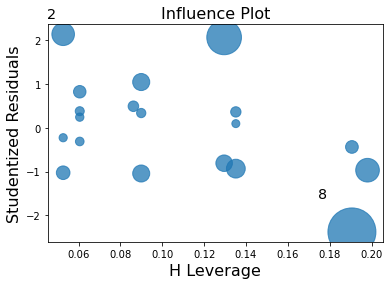

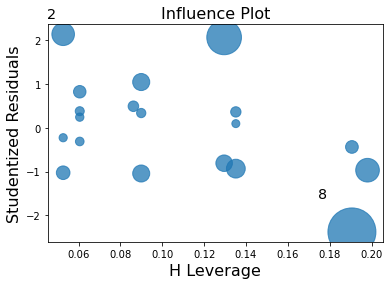

In [63]:
influence_plot(model)

In [65]:
time = time.drop(index = [2,8])

In [66]:
model = smf.ols('delivery_time ~ sorting_time',data = time).fit()

In [69]:
print(model.rsquared,model.rsquared_adj)

0.8708531723135906 0.8622433838011633


In [71]:
time.shape

(17, 2)

In [80]:
new_data = {'sorting_time' : [15,18,19,10]}

In [81]:
test_dataframe = pd.DataFrame(new_data)

In [82]:
test_dataframe.head()

,sorting_time
0,15
1,18
2,19
3,10


In [83]:
model.predict(test_dataframe)

0    30.856780
1    35.858805
2    37.526146
3    22.520073
dtype: float64